In [1]:
import pandas as pd
import nltk
import re
import unidecode
import spacy

In [2]:
df = pd.read_csv("IMDB Dataset.csv", encoding="latin1", header=None)

In [3]:
df.shape

(50001, 2)

In [4]:
df.describe()

,0,1
count,50001,50001
unique,49583,3
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [5]:
df.head()

,0,1
0,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative


In [6]:
df.drop(0,inplace=True)

In [7]:
df.head()

,0,1
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.columns = ['Review','Sentiment']
df.head()

,Review,Sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df['Sentiment'].replace(to_replace="positive",value=1,inplace=True)
df['Sentiment'].replace(to_replace="negative",value=0,inplace=True)

In [10]:
df.tail()

,Review,Sentiment
49996,I thought this movie did a down right good job...,1
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49998,I am a Catholic taught in parochial elementary...,0
49999,I'm going to have to disagree with the previou...,0
50000,No one expects the Star Trek movies to be high...,0


In [11]:
#Fetch a small data set with 5000 records
one = df[df['Sentiment']==1][:2500]
two = df[df['Sentiment']==0][:2500]

In [12]:
df = one.append(two,ignore_index=True)

In [13]:
df.tail()

,Review,Sentiment
4995,"The Bermuda Triangle ,we are told in this wast...",0
4996,"After watching this on the MST3K episode, I ha...",0
4997,Boring movie. Poor plot. Poor actors. The movi...,0
4998,"This is not a boring movie, the audience might...",0
4999,i tried to sit through this bomb not too long ...,0


## Pre Processing of Data

In [14]:
#From here all the details like extra spaces, punctuations, html related tags would be removed
#Convert all to lower cases

df['Review'] = df['Review'].apply(lambda x:str(x).lower())

In [15]:
df.head()

,Review,Sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,"petter mattei's ""love in the time of money"" is...",1
4,"probably my all-time favorite movie, a story o...",1


In [16]:
## Removal of special characters
df['Review'] = df['Review'].apply(lambda x: re.sub("[^A-Z a-z 0-9-]+",'',x))

In [17]:
df.head()

,Review,Sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,petter matteis love in the time of money is a ...,1
4,probably my all-time favorite movie a story of...,1


In [18]:
#Remove multiple space if any
text = "Hello     my    anme is  asdf"
" ".join(text.split())

'Hello my anme is asdf'

In [19]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x.split()))

In [20]:
df.head()

,Review,Sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,petter matteis love in the time of money is a ...,1
4,probably my all-time favorite movie a story of...,1


In [21]:
print(df.iloc[1]['Review'])

a wonderful little production br br the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen- michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done


In [22]:
#Removal of accented text
accented_string = "áéíÓÚ   ãõñÃÕÑ   äëüÖÜ"
# accented_string is of type 'unicode'
unaccented_string = unidecode.unidecode(accented_string)
print(unaccented_string)

aeiOU   aonAON   aeuOU


In [23]:
df['Review'] = df['Review'].apply(lambda x: unidecode.unidecode(x))

In [24]:
df.head()

,Review,Sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,petter matteis love in the time of money is a ...,1
4,probably my all-time favorite movie a story of...,1


In [26]:
#Count the total stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [27]:
#Removal of stop words - can be done using nltk or spacy
df['Review'] = df['Review'].apply(lambda x: " ".join([t for t in str(x).split() if t not in stopwords]))

In [28]:
df.head()

,Review,Sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,petter matteis love time money visually stunni...,1
4,probably all-time favorite movie story selfles...,1


In [29]:
#Convert to base or root form of words
nlp = spacy.load("en_core_web_sm")

In [30]:
x="I am running with you and jumping in the pool area before swimming"

In [31]:
def convert_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        x_list.append(lemma)
    return " ".join(x_list)
#     print(" ".join(x_list))

In [32]:
convert_to_base(x)

'I be run with you and jump in the pool area before swim'

In [33]:
%%time
df['Review'] = df['Review'].apply(lambda x: convert_to_base(x))

Wall time: 2min 14s


In [34]:
df.head()

,Review,Sentiment
0,one reviewer mention watch 1 oz episode you ll...,1
1,wonderful little production br br filming tech...,1
2,think wonderful way spend time hot summer week...,1
3,petter matteis love time money visually stunni...,1
4,probably all - time favorite movie story selfl...,1


In [35]:
#Common words removal
text = " ".join(df['Review'])
text = text.split()

In [36]:
freq_words = pd.Series(text).value_counts()

In [37]:
f20words = freq_words[:20]

In [38]:
f20words

br           11557
-            10796
movie        10138
film          9191
nt            6662
one           5414
see           4608
make          4576
like          4344
do            3993
good          3967
well          3436
get           3249
time          2957
character     2744
go            2719
would         2715
watch         2679
bad           2553
story         2510
dtype: int64

In [39]:
df['Review'] = df['Review'].apply(lambda x: " ".join([t for t in x.split() if t not in f20words]))

In [40]:
df.head()

,Review,Sentiment
0,reviewer mention 1 oz episode you ll hooked ri...,1
1,wonderful little production filming technique ...,1
2,think wonderful way spend hot summer weekend s...,1
3,petter matteis love money visually stunning mr...,1
4,probably all favorite selflessness sacrifice d...,1


In [41]:
#Rare occuring words removal
rare20words = freq_words[-20:]
rare20words

runningbound           1
umi                    1
wittgenstein           1
vibrancy               1
marvellously           1
destabalize            1
kaylee                 1
josef                  1
gram                   1
intertitle             1
renye                  1
endingwhy              1
upkeep                 1
pawel                  1
gussie                 1
themedrugsmarijuana    1
ere                    1
beautician             1
burman                 1
obliviousholier        1
dtype: int64

In [42]:
df['Review'] = df['Review'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20words]))

In [43]:
df.head()

,Review,Sentiment
0,reviewer mention 1 oz episode you ll hooked ri...,1
1,wonderful little production filming technique ...,1
2,think wonderful way spend hot summer weekend s...,1
3,petter matteis love money visually stunning mr...,1
4,probably all favorite selflessness sacrifice d...,1


In [44]:
#Divide into X and Y
X = df['Review']
y = df['Sentiment']

In [45]:
X.head()

0    reviewer mention 1 oz episode you ll hooked ri...
1    wonderful little production filming technique ...
2    think wonderful way spend hot summer weekend s...
3    petter matteis love money visually stunning mr...
4    probably all favorite selflessness sacrifice d...
Name: Review, dtype: object

In [46]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Sentiment, dtype: int64

In [47]:
y.value_counts()

0    2500
1    2500
Name: Sentiment, dtype: int64

In [48]:
#conversion of strings to numbers
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [50]:
%%time
X_tfidf = tfidf.fit_transform(X).toarray()

Wall time: 1.12 s


In [51]:
X_tfidf.shape

(5000, 39199)

In [52]:
type(X_tfidf)

numpy.ndarray

In [58]:
X=X_tfidf

In [53]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
y_train.value_counts()

0    2000
1    2000
Name: Sentiment, dtype: int64

In [61]:
X_train.shape

(4000, 39199)

In [62]:
#Training model with Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
imbd_review = MultinomialNB().fit(X_train, y_train)

In [63]:
y_pred = imbd_review.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred)
print(con_matrix)

[[453  47]
 [102 398]]


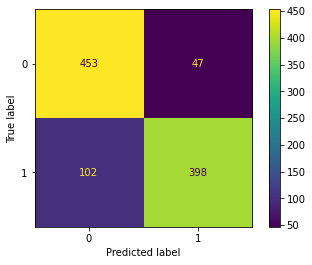

In [65]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(imbd_review, X_test, y_test)

plt.show()

In [67]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.851
0.8423280423280423


In [89]:
string = ["Movie was just wonderful"]

In [93]:
def preprocess(text):
    sentence = str(text).lower()
    sentence = re.sub("[^A-Z a-z 0-9-]+",'',sentence)
    sentence = " ".join(sentence.split())
    sentence = unidecode.unidecode(sentence)
    sentence = " ".join([t for t in str(sentence).split() if t not in stopwords])
    sentence = convert_to_base(sentence)
    sentence = " ".join([t for t in sentence.split() if t not in f20words])
    sentence = " ".join([t for t in sentence.split() if t not in rare20words])
    return sentence

In [94]:
print(preprocess(["Movie was just wonderful"]))

wonderful


In [101]:
vect = tfidf.transform([preprocess(["This is a excellent movie"])]).toarray()

In [102]:
print(imbd_review.predict(vect))

[1]
